In [24]:
%load_ext autoreload
%autoreload 2

import sys
import json
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/2-Shot-ADAPT-VQE/')
print(sys.executable)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


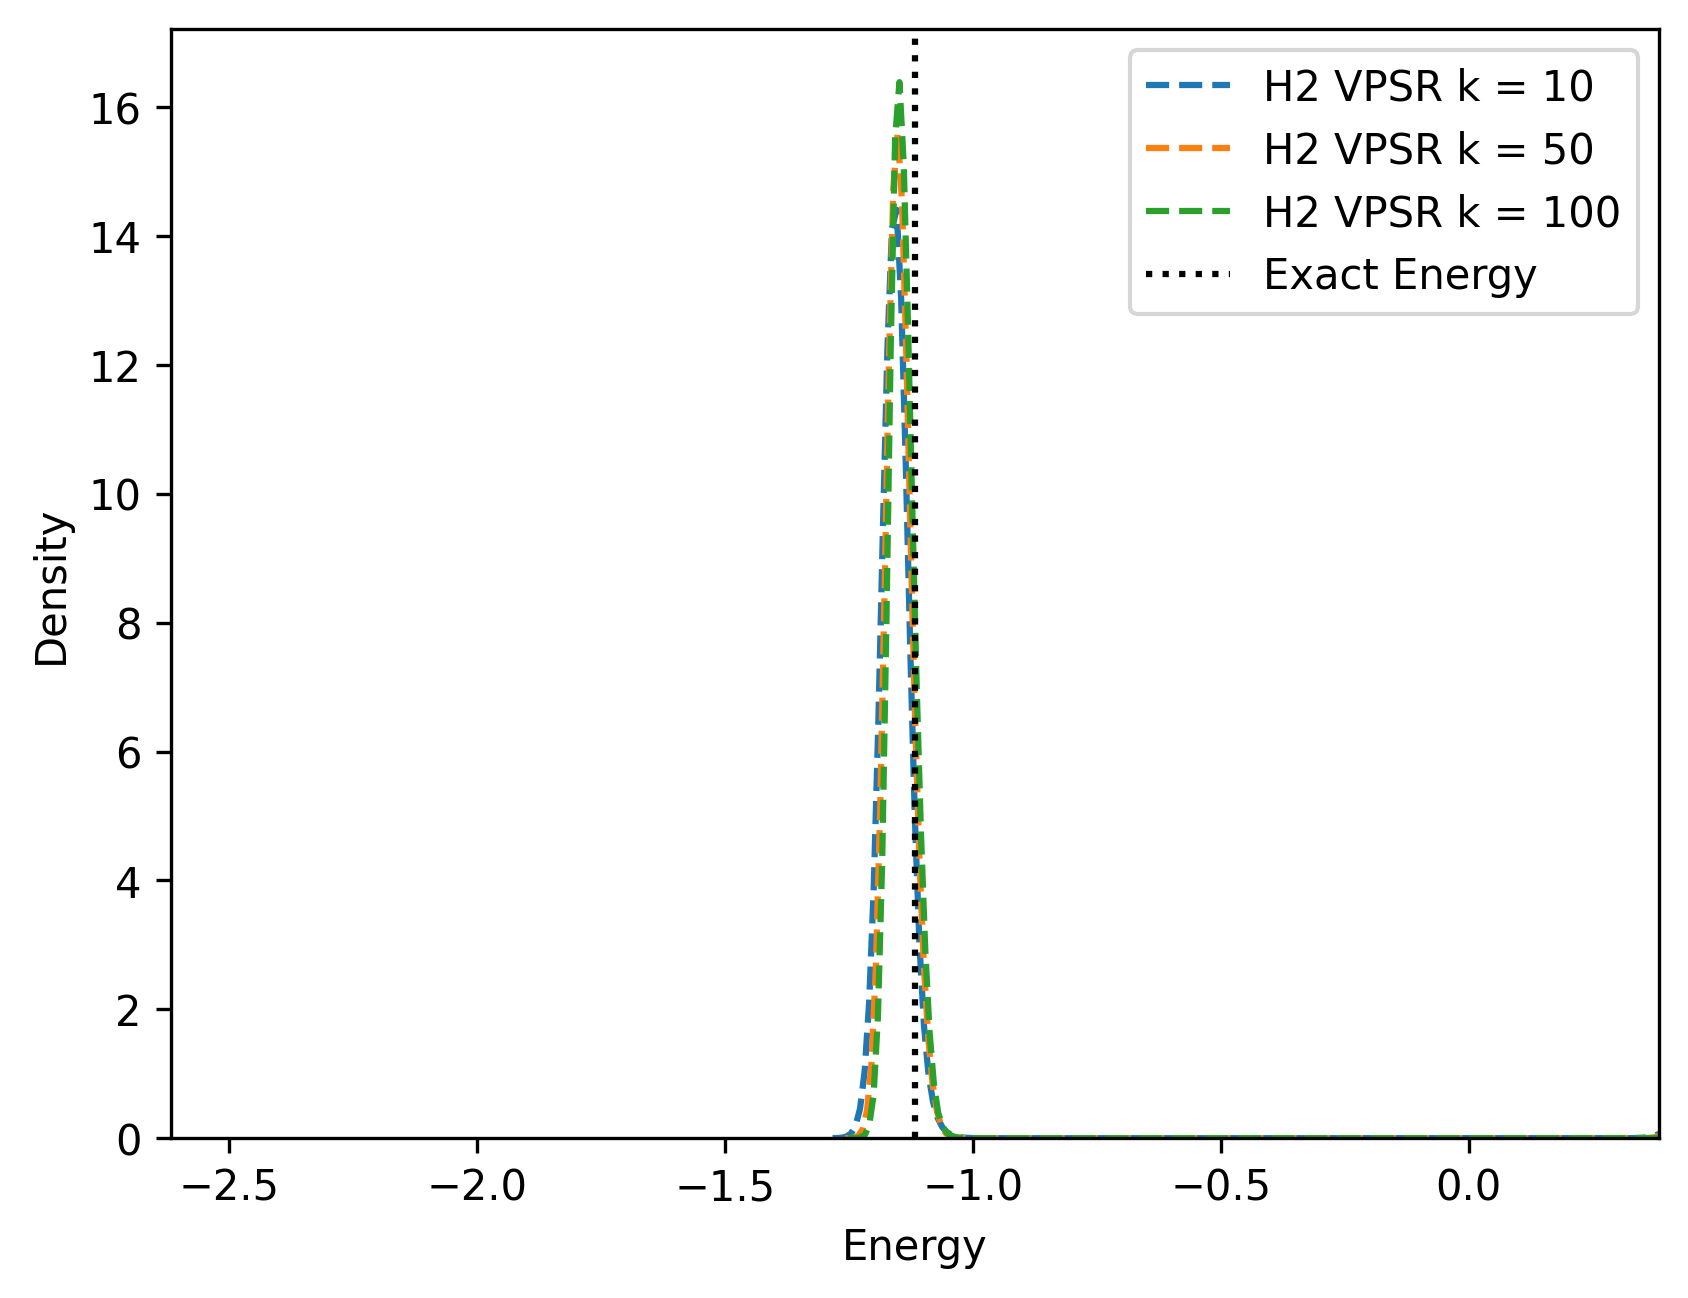

In [28]:
plt.rcParams['figure.dpi'] = 300
file_names = [
    # ['h2_uniform_N10000_k10.json', 'H2 Uniform k = 10'],
    # ['h2_vmsa_N10000_k10.json', 'H2 VMSA k = 10'],
    # ['h2_vmsa_N10000_k100.json', 'H2 VMSA k = 100'],
    ['h2_vpsr_N10000_k10.json', 'H2 VPSR k = 10'],
    ['h2_vpsr_N10000_k50.json', 'H2 VPSR k = 50'],
    ['h2_vpsr_N10000_k100.json', 'H2 VPSR k = 100'],
]

data = []
for file_name in file_names:
    with open(file_name[0], 'r') as f:
        data.append(json.load(f))

exact_energy = -1.1166512474115213
x_lim = 1.5

for i in range(len(data)):
    sorted_data = sorted(data[i])

    sns.kdeplot(sorted_data, label=f'{file_names[i][1]}', linestyle='--')


plt.axvline(exact_energy, linestyle='dotted', label='Exact Energy', color='black')
plt.xlim(exact_energy-x_lim, exact_energy+x_lim)
plt.xlabel('Energy')
plt.legend()


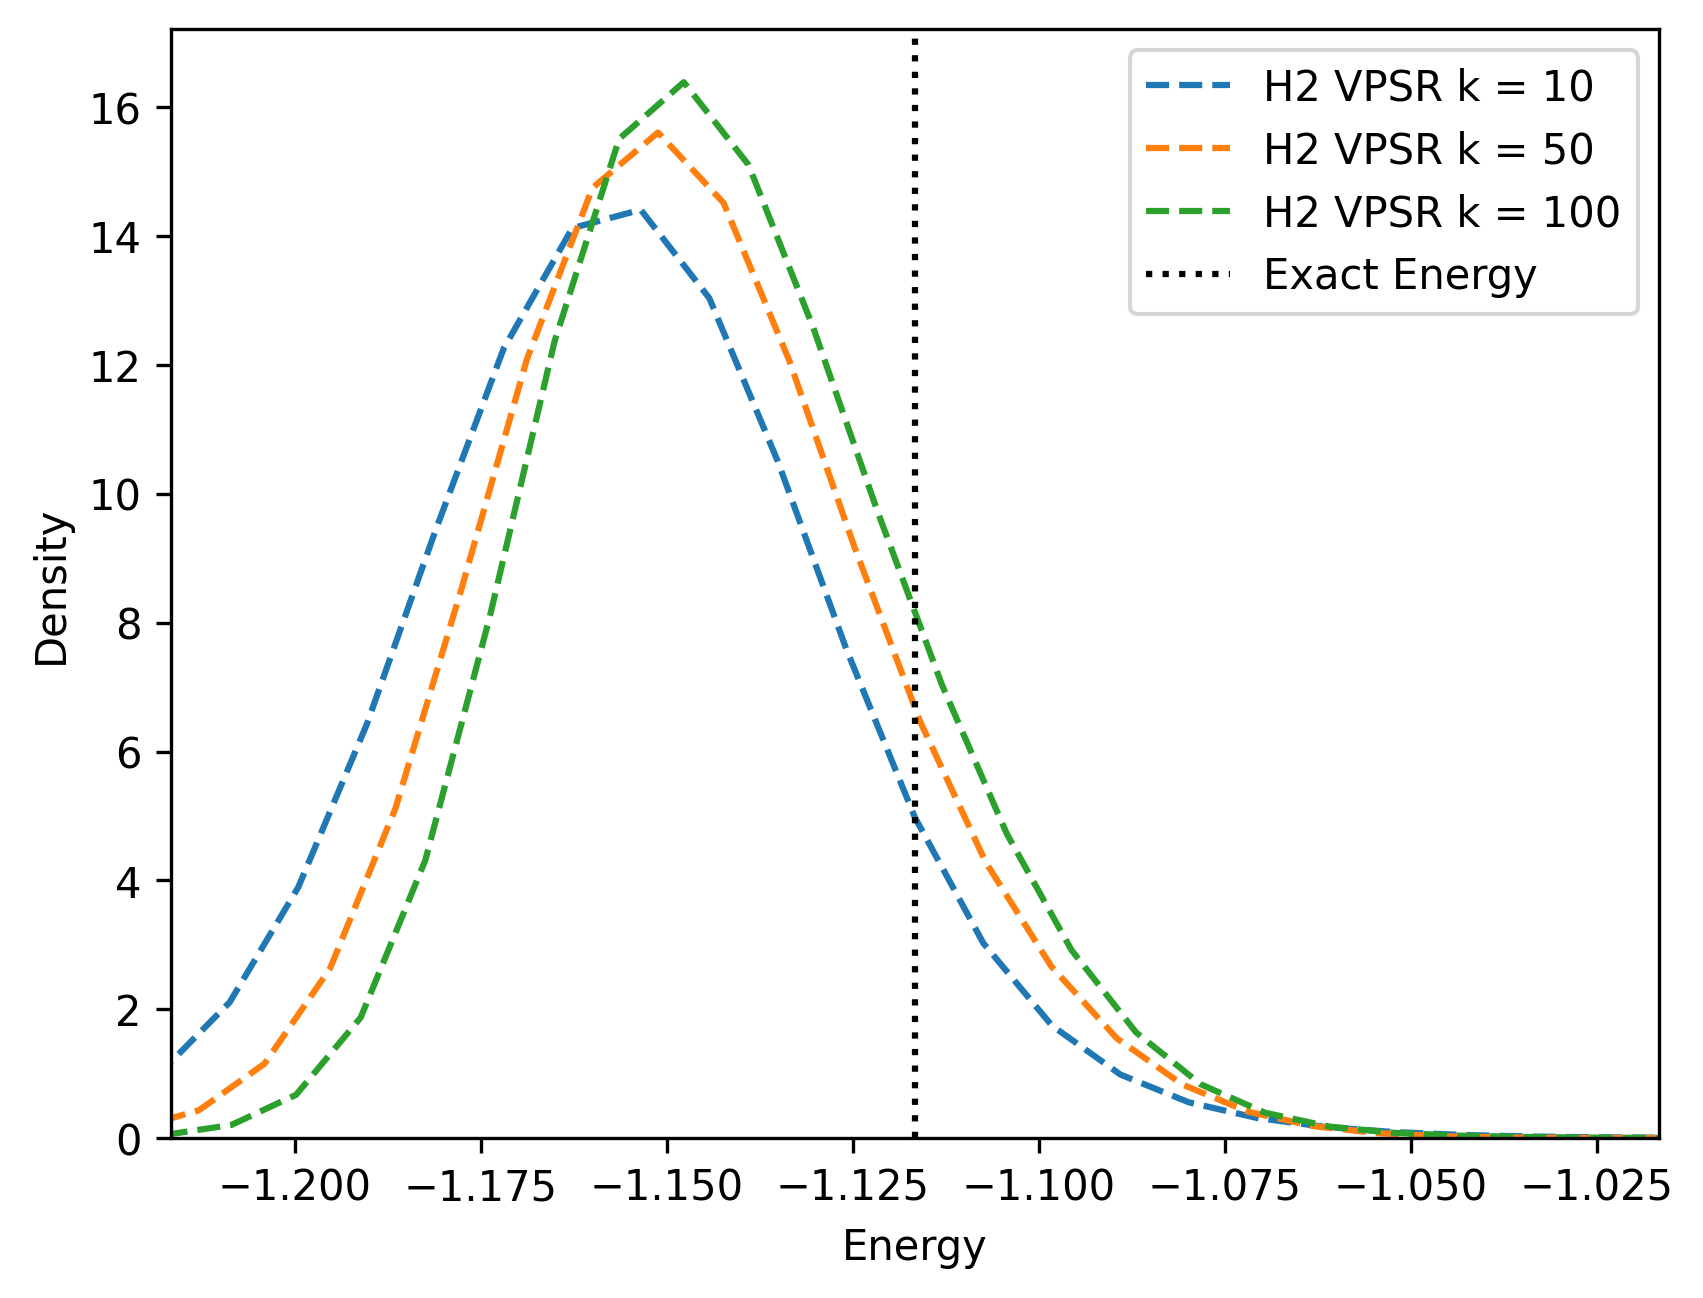

In [26]:
plt.rcParams['figure.dpi'] = 300

file_names = [
    # ['h2_uniform_N10000_k10.json', 'H2 Uniform k = 10'],
    # ['h2_vmsa_N10000_k10.json', 'H2 VMSA k = 10'],
    # ['h2_vmsa_N10000_k100.json', 'H2 VMSA k = 100'],
    ['h2_vpsr_N10000_k10.json', 'H2 VPSR k = 10'],
    ['h2_vpsr_N10000_k50.json', 'H2 VPSR k = 50'],
    ['h2_vpsr_N10000_k100.json', 'H2 VPSR k = 100'],
]

data = []
for file_name in file_names:
    with open(file_name[0], 'r') as f:
        data.append(json.load(f))

exact_energy = -1.1166512474115213
x_lim = 0.1

for i in range(len(data)):
    sorted_data = sorted(data[i])

    sns.kdeplot(sorted_data, label=f'{file_names[i][1]}', linestyle='--')


plt.axvline(exact_energy, linestyle='dotted', label='Exact Energy', color='black')
plt.xlim(exact_energy-x_lim, exact_energy+x_lim)
plt.xlabel('Energy')
plt.legend()


Loaded data from 'data.json': [-1.1600120711384079, -1.156965813699254, -1.1556547683673888, -1.1541141653503568, -1.1464386409594505, -1.158839622074158, -1.158112107522403, -1.1455369934084054, -1.1502024598535696, -1.1226008347269085, -1.1591875897494774, -1.1622044116662111, -1.1556966422299337, -1.1535197222580442, -1.1544029154470525, -1.1577442516587717, -1.1543591664735458, -1.1513721092117626, -1.1600046962782256, -1.16901522464584, -1.1530280638340107, -1.15974825580408, -1.1648859586817621, -1.1594632393332458, -1.1624087196803043, -1.1353821567867375, -1.150304615939203, -1.1540113677063388, -1.1681835230559363, 0.4152569791231771, -1.1550868422142584, -1.1545745715502924, -1.1588959099595582, -1.166201166573605, -1.1584860055985688, -1.1560887308419834, -1.153652303129088, -1.1552104784509538, -1.157026545688631, -1.1474089486457193, -1.1552724053107817, -1.1531854151817897, -1.1532868781452066, -1.1645878836652557, -1.1653209493011722, -1.1528193725431024, -1.154555603889

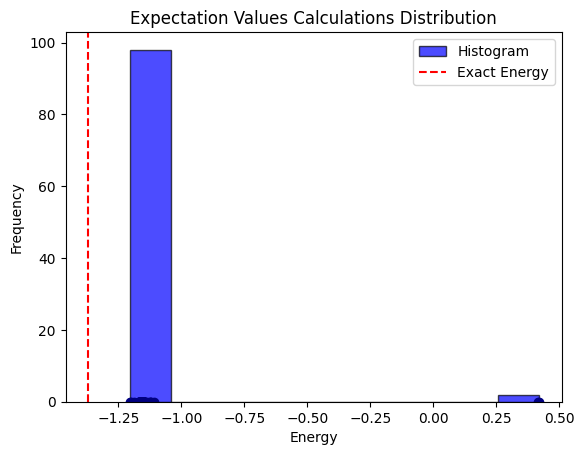

In [4]:
from src.pools import QE
from src.molecules import create_h2, create_h3

from algorithms.adapt_vqe_v2 import AdaptVQE

r = 0.742
molecule = create_h2(r)
pool = QE(molecule)

adapt_vqe = AdaptVQE(pool=pool,
                    molecule=molecule,
                    max_adapt_iter=10,
                    max_opt_iter=100,
                    grad_threshold=10**-5,
                    vrb=True,
                    optimizer_method='bfgs',
                    shots_assignment='vpsr',
                    k=10,
                    shots_budget=1000,
                    N_experiments=10000
                    # seed=3
                    )


# adapt_vqe.analyze_k()
data = adapt_vqe.load_and_plot_histogram("data.json", exact_energy=-1.37)

In [44]:
len(data)

100

[-1.1600120711384079, -1.156965813699254, -1.1556547683673888, -1.1541141653503568, -1.1464386409594505, -1.158839622074158, -1.158112107522403, -1.1455369934084054, -1.1502024598535696, -1.1226008347269085, -1.1591875897494774, -1.1622044116662111, -1.1556966422299337, -1.1535197222580442, -1.1544029154470525, -1.1577442516587717, -1.1543591664735458, -1.1513721092117626, -1.1600046962782256, -1.16901522464584, -1.1530280638340107, -1.15974825580408, -1.1648859586817621, -1.1594632393332458, -1.1624087196803043, -1.1353821567867375, -1.150304615939203, -1.1540113677063388, -1.1681835230559363, 0.4152569791231771, -1.1550868422142584, -1.1545745715502924, -1.1588959099595582, -1.166201166573605, -1.1584860055985688, -1.1560887308419834, -1.153652303129088, -1.1552104784509538, -1.157026545688631, -1.1474089486457193, -1.1552724053107817, -1.1531854151817897, -1.1532868781452066, -1.1645878836652557, -1.1653209493011722, -1.1528193725431024, -1.1545556038896612, -1.167359566718613, -1.1

(-2.6166512474115216, 0.38334875258847867)

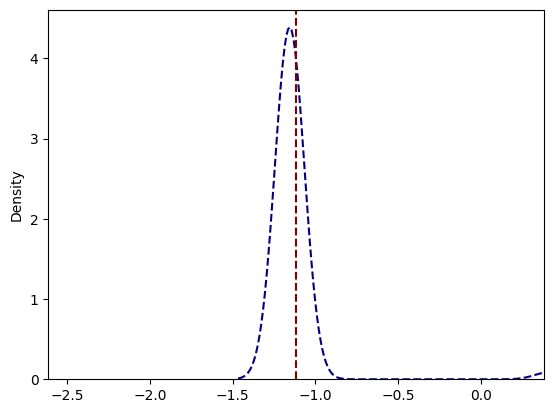

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 1

exact_energy = -1.1166512474115213
print(data)
mean = np.mean(data)
std_dev = np.std(data)
filtered_data = [x for x in data if abs(x - mean) <= threshold * std_dev]

sorted_data = sorted(data)

# Create the density plot (like a histogram without bins)
sns.kdeplot(sorted_data, color='navy', linewidth=1.5, label='Density', linestyle='--')

# Add vertical line for the exact energy
plt.axvline(exact_energy, color='maroon', linestyle='--', linewidth=1.5, label='Exact Energy')
plt.xlim(exact_energy-1.5, exact_energy+1.5)
# Add dots at the data points
# plt.plot(sorted_data, [0] * len(sorted_data), 'o', color='navy', label='Data Points')


# sns.histplot(filtered_data, bins=50, kde=True, color='blue', edgecolor='black', label='Histogram', alpha=0.1, linestyle='--')

# plt.hist(filtered_data, bins=10, color='blue', alpha=0.7, edgecolor='black', label='Histogram')
# plt.axvline(exact_energy, color='red', linestyle='--', linewidth=1.5, label='Exact Energy')

Loaded data from 'h2_N1000_k10.json': [-1.1569482514662817, -1.1608778206571273, -1.1542750572618095, -1.1616889237846502, -1.192752110176121, -1.146066217093895, -1.1510596903804706, -1.1620638218103079, -1.1633548077357745, -1.1636421163503985, -1.1593037816793132, -1.1601918748945115, -1.1629874874092, -1.1590894773879226, -1.1557451184010474, -1.152187798266685, -1.159112536972482, -1.1492255408071226, -1.1579134465683079, -1.1573550788661953, -1.1435589547820575, -1.1568577480231361, -1.1201147433908787, -1.1527047080266495, -1.1561629611216737, -1.1510908908829518, -1.1607733284280501, -1.1591886688433897, -1.1574624728557088, -1.1560855998556696, -1.1463425489066335, -1.1549686891222488, -1.1272283680694013, -1.1553252275922201, -1.1624928829152106, -1.1547621561195796, -1.1490792810775279, -1.1210599740052822, -1.1605142695816915, -1.1433973441748533, -1.155521806617031, -1.1588791315457518, -1.1586759619581024, -1.1312304757189011, -1.1268635291316413, -1.1574066000935082, -1.

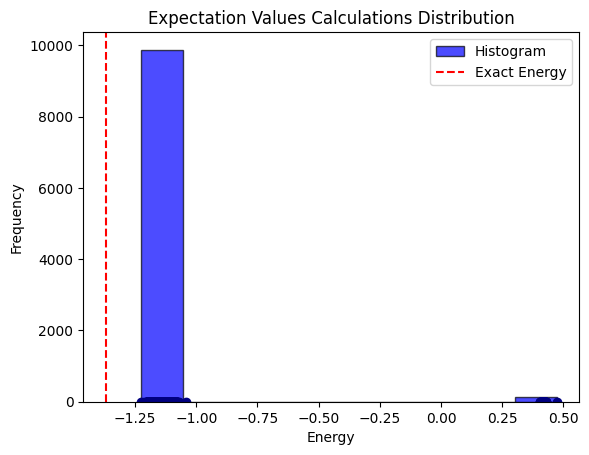

In [45]:
h2_N1000_k10 = adapt_vqe.load_and_plot_histogram("h2_N1000_k10.json", exact_energy=-1.37)

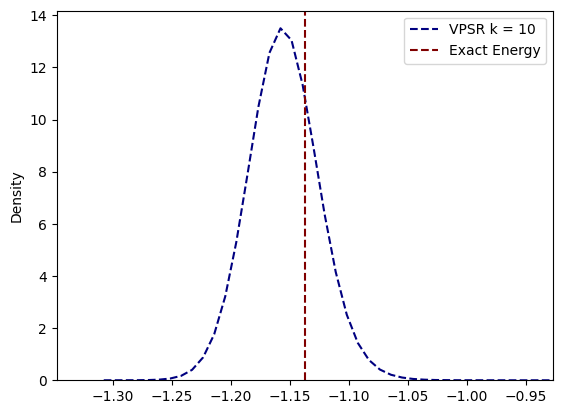

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

threshold = 1

exact_energy = -1.137263338363534

# Create the density plot (like a histogram without bins)
sns.kdeplot(h2_N1000_k10, color='navy', linewidth=1.5, label='VPSR k = 10', linestyle='--')

# Add vertical line for the exact energy
plt.axvline(exact_energy, color='maroon', linestyle='--', linewidth=1.5, label='Exact Energy')
plt.xlim(exact_energy-0.21, exact_energy+0.21)
plt.legend()
# Add dots at the data points
# plt.plot(sorted_data, [0] * len(sorted_data), 'o', color='navy', label='Data Points')


# sns.histplot(filtered_data, bins=50, kde=True, color='blue', edgecolor='black', label='Histogram', alpha=0.1, linestyle='--')

# plt.hist(filtered_data, bins=10, color='blue', alpha=0.7, edgecolor='black', label='Histogram')
# plt.axvline(exact_energy, color='red', linestyle='--', linewidth=1.5, label='Exact Energy')

In [87]:
h2_N10000_k100 = adapt_vqe.load_and_plot_histogram("h2_N10000_k100.json", exact_energy=-1.37)
h2_N10000_k10 = adapt_vqe.load_and_plot_histogram("h2_N10000_k10.json", exact_energy=-1.37)
h2_N10000_U = adapt_vqe.load_and_plot_histogram("h2_N10000_U.json", exact_energy=-1.37)

Loaded data from 'h2_N10000_k100.json': [-1.130688888771509, -1.1457455266136274, -1.1425475126175393, -1.1578384458877298, -1.1393471005185694, -1.145393951683407, -1.1276282043699566, -1.1426221692951095, -1.1423216880764002, -1.1312200018223102, -1.1410965322278426, -1.1313017290137815, -1.1463008975754327, -1.1145807433387174, -1.1270864111879881, -1.123907954583434, -1.1222469320397697, -1.1688594936531143, -1.144550233139449, -1.1518130923829666, -1.1547375901202137, -1.1627499910110726, -1.1516652455060892, -1.13003657791142, -1.1695179603986585, -1.120151874815938, -1.1544142933532684, -1.1483012218729827, -1.1247979507610653, -1.1419563641484363, -1.1271125157695605, -1.164276021430314, -1.1378571469879075, -1.0936402258135407, -1.1528220176322506, -1.1536717216250345, -1.1358785603127675, -1.1441699933668488, -1.153544276795593, -1.1551392153209994, -1.1519489465090742, -1.1606778865889171, -1.147334625163179, -1.147303444322485, -1.1587822341475156, -1.1240069683592722, -1.1

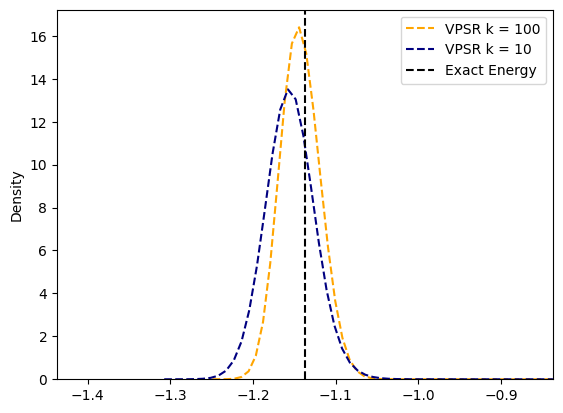

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

exact_energy = -1.137263338363534

# Create the density plot (like a histogram without bins)
sns.kdeplot(h2_N10000_k100, color='orange', linewidth=1.5, label='VPSR k = 100', linestyle='--')
sns.kdeplot(h2_N10000_k10, color='navy', linewidth=1.5, label='VPSR k = 10', linestyle='--')
# sns.kdeplot(h2_N10000_U, color='red', linewidth=1.5, label='Uniform', linestyle='--')
# print(len(h2_N10000_U))
# print(len(h2_N10000_k10))
# Add vertical line for the exact energy
plt.axvline(exact_energy, color='black', linestyle='--', linewidth=1.5, label='Exact Energy')
x_lim = 0.3
plt.xlim(exact_energy-x_lim, exact_energy+x_lim)
plt.legend()

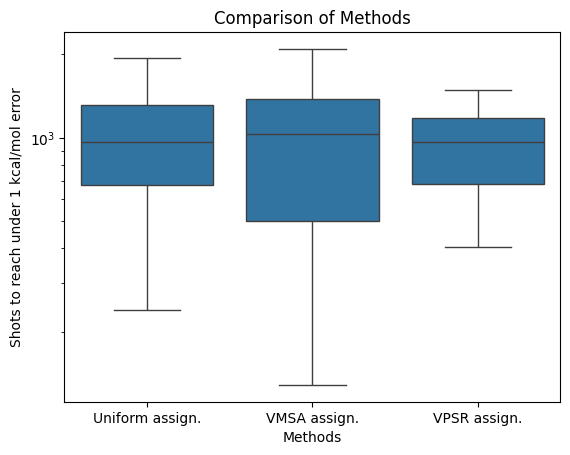

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Example data as a list of dictionaries

# Define the parameters for the random number generation
lower_bound = 100  # minimum number of shots
upper_bound = 1000  # maximum number of shots
num_samples = 100  # number of dummy data points to generate

# Generate the random data for number of shot measurements
uniform = [random.randint(200, 2000) for _ in range(num_samples)]
vmsa = [random.randint(100, 2100) for _ in range(num_samples)]
vpsr = [random.randint(400, 1500) for _ in range(num_samples)]


data = {
    "Uniform assign.": uniform,
    "VMSA assign.": vmsa,
    "VPSR assign.": vpsr,
}

# Convert the dictionary to a long-form DataFrame for seaborn
import pandas as pd
df = pd.DataFrame([(key, val) for key, values in data.items() for val in values], columns=["Method", "Shots"])

# Create the box plot
sns.boxplot(x="Method", y="Shots", data=df)
plt.yscale('log')  # Optional: If your data has a wide range
plt.xlabel("Methods")
plt.ylabel("Shots to reach under 1 kcal/mol error")
plt.title("Comparison of Methods")
plt.show()
